# Module 3 Project

# Imports



In [392]:
from api import key
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# API Requests 

In [2]:

url =  "https://api.eia.gov/series/?api_key=106ca842268ae4f59b5872302c603bf2&series_id=EMISS.CO2-TOTV-RC-TO-DC.A" 
response = requests.get(url)

In [3]:
DC_Transportation = response.json()


In [4]:
DC_Transport = pd.DataFrame(DC_Transportation['series'][0]['data'])
DC_Transport.columns = [['Year', 'CO2 Emissions (million metric tons)']]
DC_Transport.head(2)

,Year,CO2 Emissions (million metric tons)
0,2017,0.663171
1,2016,0.638522


In [232]:
url =  "https://api.eia.gov/series/?api_key=106ca842268ae4f59b5872302c603bf2&series_id=EMISS.CO2-TOTV-IC-TO-DC.A" 
response = requests.get(url)

In [233]:
DC_Residential = response.json()
DC_Residential = pd.DataFrame(DC_Residential['series'][0]['data'])
DC_Residential.columns = [['Year', 'CO2 Emissions (million metric tons)']]
DC_Residential.head(2)

,Year,CO2 Emissions (million metric tons)
0,2017,0.019913
1,2016,0.031299


In [7]:
url = 'https://api.eia.gov/series/?api_key=106ca842268ae4f59b5872302c603bf2&series_id=EMISS.CO2-TOTV-CC-TO-DC.Ahttps://api.eia.gov/series/?api_key=106ca842268ae4f59b5872302c603bf2&series_id=EMISS.CO2-TOTV-CC-TO-DC.A'
response = requests.get(url)
DC_Commercial = response.json()
DC_Commercial = pd.DataFrame(DC_Commercial['series'][0]['data'])
DC_Commercial.columns = [['Year', 'CO2 Emissions (million metric tons)']]
DC_Commercial.head(2)

,Year,CO2 Emissions (million metric tons)
0,2017,0.942947
1,2016,0.944227


In [196]:
url = 'https://api.eia.gov/series/?api_key=106ca842268ae4f59b5872302c603bf2&series_id=EMISS.CO2-TOTV-IC-TO-DC.A'
response = requests.get(url)
DC_Industrial = response.json()  
DC_Industrial = pd.DataFrame(DC_Industrial['series'][0]['data'])
DC_Industrial.columns = [['Year', 'CO2 Emissions (million metric tons)']]
DC_Industrial.head()


,Year,CO2 Emissions (million metric tons)
0,2017,0.019913
1,2016,0.031299
2,2015,0.022500
3,2014,0.026327
4,2013,0.020866


In [255]:
_STATES =  {'Alabama' : 'AL',
'Alaska' : 'AK',
'Arizona' : 'AZ',
'Arkansas' : 'AR',
'California' : 'CA',
'Colorado' : 'CO',
'Connecticut' : 'CT',
'Delaware' : 'DE',
'Florida' : 'FL',
'Georgia' : 'GA',
'Hawaii' : 'HI',
'Idaho' : 'ID',
'Illinois' : 'IL',
'Indiana' : 'IN',
'Iowa' : 'IA',
'Kansas' : 'KS',
'Kentucky' : 'KY',
'Louisiana' : 'LA',
'Maine' : 'ME',
'Maryland' : 'MD',
'Massachusetts' : 'MA',
'Michigan' : 'MI',
'Minnesota' : 'MN',
'Mississippi' : 'MS',
'Missouri' : 'MO',
'Montana' : 'MT',
'Nebraska' : 'NE',
'Nevada' : 'NV',
'New Hampshire' : 'NH',
'New Jersey' : 'NJ',
'New Mexico' : 'NM',
'New York' : 'NY',
'North Carolina' : 'NC',
'North Dakota' : 'ND',
'Ohio' : 'OH',
'Oklahoma' : 'OK',
'Oregon' : 'OR',
'Pennsylvania' : 'PA',
'Rhode Island' : 'RI',
'South Carolina' : 'SC',
'South Dakota' : 'SD',
'Tennessee' : 'TN',
'Texas' : 'TX',
'Utah' : 'UT',
'Vermont' : 'VT',
'Virginia' : 'VA',
'Washington' : 'WA',
'West Virginia' : 'WV',
'Wisconsin' : 'WI',
'Wyoming' : 'WY'
}

In [274]:
_STATES.values()

dict_values(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'])

In [588]:
url =  "https://api.eia.gov/series" 

PARMS = {'api_key':'106ca842268ae4f59b5872302c603bf2',
         'series_id': 'EMISS.CO2-TOTV-TT-TO-DC.A' 
        }

data = []


#Initialize an empty dataframe to begin
df = pd.DataFrame()

# Call the api multiple times for each state
for state in _STATES.values():
    
    # Reconstruct the series_id string to reflect the state
    PARMS['series_id'] = PARMS['series_id'][:21] + state + '.A'  
    response = requests.get(url, params=PARMS)
    data.append(response)
    

# Iterate through all the responses saved in the list called 'data'
for tmp in data:
    
    #Save the dataframe to a temporary spot called '_'
    _ = pd.DataFrame(tmp.json()['series'][0]['data'], columns = ['Year', 'Carbon_Emissions'])
                     
    # Create a third column called 'State' and set the defualt value to the name of the state                 
    _['State'] = tmp.json()['series'][0]['name'].split(', ')[2]
                     
    #update our main dataframe with additional rows
    df = pd.concat([df, _]) 

In [589]:
df.head()

,Year,Carbon_Emissions,State
0,2017,109.018634,Alabama
1,2016,114.872696,Alabama
2,2015,120.012608,Alabama
3,2014,123.080771,Alabama
4,2013,120.732885,Alabama


In [590]:
grouped = df.groupby('State')
grouped = pd.DataFrame(grouped.sum())


In [591]:
grouped.reset_index(inplace=True)
grouped.head()


,State,Carbon_Emissions
0,Alabama,4630.514409
1,Alaska,1386.963112
2,Arizona,2946.139243
3,Arkansas,2162.827593
4,California,13376.910904


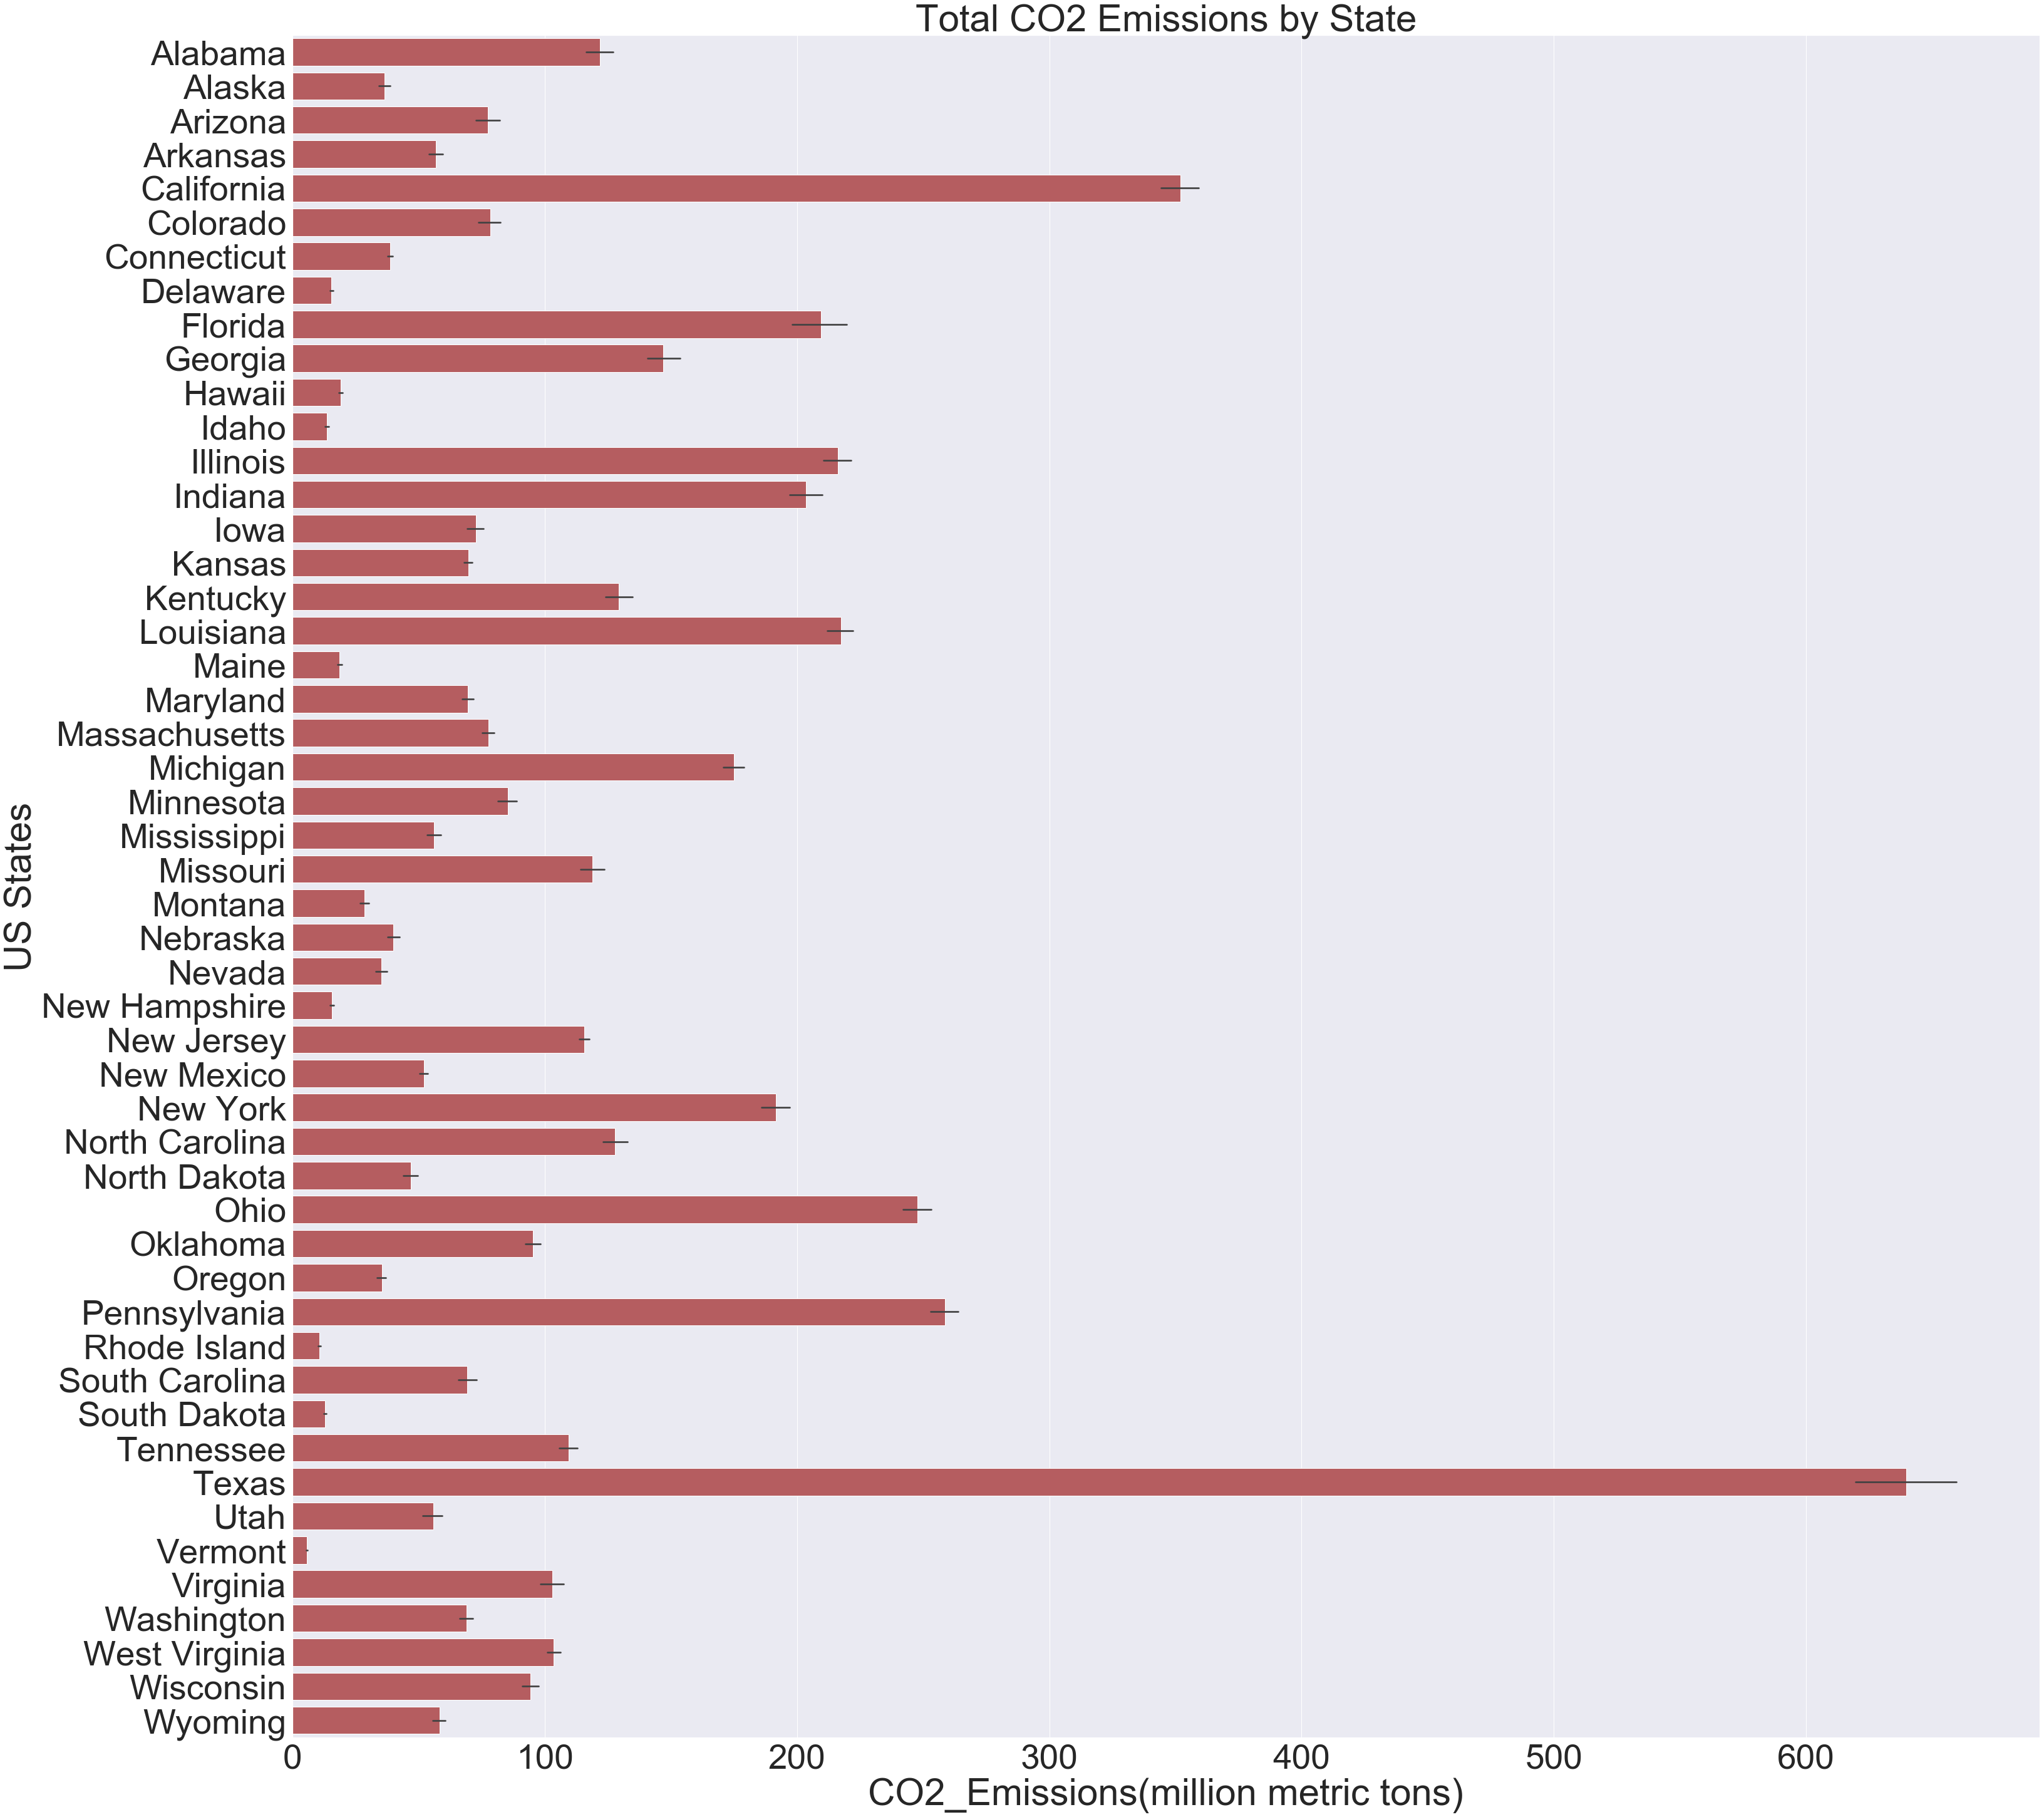

In [600]:
plt.figure(figsize=(50, 50))
sns.barplot(df.Carbon_Emissions, df.State, color='r')
plt.xlabel('CO2_Emissions(million metric tons)')
plt.ylabel('US States')
plt.title('Total CO2 Emissions by State')
sns.set(context='notebook',
        style='darkgrid',
        palette='deep',
        font='sans-serif',
        font_scale=5)


In [593]:
grouped['Region'] = None
grouped.head()

,State,Carbon_Emissions,Region
0,Alabama,4630.514409,None
1,Alaska,1386.963112,None
2,Arizona,2946.139243,None
3,Arkansas,2162.827593,None
4,California,13376.910904,None


In [594]:
South_East = ['Louisiana', 'Arkansas', 'Mississippi', 'Tennessee', 'Alabama', 'Kentucky', 'Florida', 'Georgia',
              'South Carolina', 'North Carolina', 'Virginia', 'West Virginia','Delaware']

North_East = [ 'Maryland', 'New Jersey', 'New York',
                 'Connecticut', 'Rhode Island', 'Massachusetts', 'New Hampshire', 'Maine',
                 'Vermont', 'Pennsylvania']

Mid_West  = ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota',
            'Missouri', 'Iowa','Wisconsin', 'Illinois', 'Indiana', 'Michigan', 'Ohio' ]

West_Coast = ['California', 'Alaska', 'Washington', 'Oregon', 'Nevada', 
                  'Idaho', 'Utah', 'Montana', 'Wyoming', 'Colorado', 
                  'Hawaii']
South_West = ['Arizona', 'New Mexico', 'Texas', 'Oaklahoma' ]
# link to NGO https://www.nationalgeographic.org/maps/united-states-regions/

In [568]:
df['Coast'] = None

In [569]:
def region_maker(state):
    if state in West_Coast:
        return 'West_Coast'
    if state in South_West:
        return 'South_West'
    if state in Mid_West:
        return 'Mid_West'
    if state in North_East:
        return 'North_East'
    if state in South_East:
        return 'South_East'
    
grouped['Region'] = grouped.State.apply(region_maker)
grouped.head()

,index,State,Carbon_Emissions,Region
0,0,Alabama,4630.514409,South_East
1,1,Alaska,1386.963112,West_Coast
2,2,Arizona,2946.139243,South_West
3,3,Arkansas,2162.827593,South_East
4,4,California,13376.910904,West_Coast


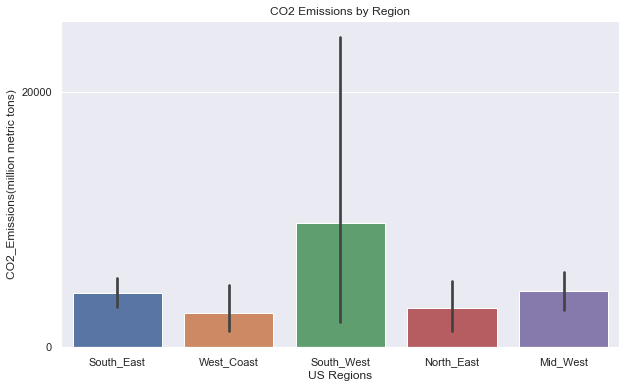

In [541]:
plt.figure(figsize=(10, 6))
sns.barplot(grouped.Region, grouped.Carbon_Emissions)
plt.ylabel('CO2_Emissions(million metric tons)')
plt.xlabel('US Regions')
plt.title('CO2 Emissions by Region')
sns.set(context='notebook',
        style='darkgrid',
        palette='deep',
        font='sans-serif',
        font_scale=5)